# Import Library

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from spyre import server
import ipywidgets as widgets
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
%matplotlib inline
from ipywidgets import interactive

# 1. Data Pre-processing

## 1.1 Load Web Scraped and Web API’s Data

In [127]:
data=pd.read_csv("WineDotCom.csv",encoding='latin-1').iloc[:,1:]
data.head()
data2=pd.read_csv("TotalWine.csv").iloc[:,1:]
data3=pd.read_csv("AmazonAPI.csv").iloc[:,1:]

## 1.2 Data Cleaning

In [ ]:
def clean_title(value):
    value = str(value).split(',')[0]
    return value
data3['Title'] = data3['Title'].apply(clean_title)

def clean_price(value):
    value = str(value).replace(',', '').replace('$', '').strip()
    return float(value)
data2['Price'] = data2['Price'].apply(clean_price)
data3['Price'] = data2['Price'].apply(clean_price)

def clean_rating(value):
    value = str(value).replace('%', '').replace('width:', '').strip()
    return float(value)/100*5
data2['StarRating'] = data2['StarRating'].apply(clean_rating)

def clean_rater(value):
    if pd.isnull(value):
        return 0
    value = str(value).split('\t')[0][1:]
    return int(value)
data2['numRater'] = data2['numRater'].apply(clean_rater)

In [ ]:
data2.head()

In [ ]:
data3.head()

## 1.3 Data Mapping

In [ ]:
data_match1=pd.DataFrame(columns=['Title', 'Title2'])
titles=list(data2['Title'].unique())
for index in data.index:
    if pd.isnull(data.loc[index]['Year']):
        year=''
    else: year=str(int(data.loc[index]['Year']))
    for title in titles:
        if year in title:
            if fuzz.token_sort_ratio(data.loc[index]['Title'], title)>=90:
                data_match1=data_match1.append({'Title': data.loc[index]['Title'],'Title2': title},ignore_index=True)
                break

In [ ]:
data_match2=pd.DataFrame(columns=['Title', 'Title2'])
titles=list(data3['Title'].unique())
for index in data.index:
    for title in titles:
        if fuzz.token_set_ratio(data.loc[index]['Title'], title)==100:
            data_match2=data_match2.append({'Title': data.loc[index]['Title'],'Title2': title},ignore_index=True)
            break

In [ ]:
df1=pd.merge(data_match,data2,left_on='Title2',right_on='Title').drop('Title_y',1).rename(columns={'Title_x':'Title'})
df1['Website']='Total Wine'
df2=pd.merge(data_match2,data3,left_on='Title2',right_on='Title').drop('Title_y',1).rename(columns={'Title_x':'Title'})
df2['Website']='Amazon'
data_compare=df1.append(df2,sort=False)
data_compare.head()
data_compare.to_csv("data_compare.csv")

In [ ]:
data['minPrice']=data['Price']
minPrice=data['minPrice'].copy()
for index in data.index:
    m=data_compare[data_compare['Title']==data.loc[index]['Title']]['Price'].min()
    if not pd.isnull(m):
        minPrice[index]=min(data.loc[index]['minPrice'],m)
data['minPrice']=minPrice

In [ ]:
data['meanRating']=data['StarRating']
data['totalRater']=data['numRater']
meanRating=data['meanRating'].copy()
totalRater=data['totalRater'].copy()
for index in data.index:
    r=data_compare[data_compare['Title']==data.loc[index]['Title']]['StarRating'].mean()
    n=data_compare[data_compare['Title']==data.loc[index]['Title']]['numRater'].sum()
    if (not pd.isnull(r)) & (not pd.isnull(n)):
        totalRater[index]=data.loc[index]['numRater']+n
        meanRating[index]=(data.loc[index]['StarRating']*data.loc[index]['numRater']+r*n)/totalRater[index]
data['meanRating']=meanRating
data['totalRater']=totalRater
data.head()
data.to_csv("data.csv")

# 2. File Loading

## 2.1 Load csv 

In [173]:
data = pd.read_csv('data.csv',encoding='latin-1').iloc[:,1:]
tasteData = pd.read_csv('Varietal_taste.csv',encoding='latin-1')
data2=pd.read_csv("TotalWine.csv").iloc[:,1:]
data3=pd.read_csv("AmazonAPI.csv").iloc[:,1:]

In [169]:
data_merged = pd.merge(data, tasteData, on = ['Varietal'], how='left')
len(data_merged)

16325

## 2.2 Load Text File  

In [129]:
#View description of varietal
all_files = os.listdir("Varietal/") #suppose you are one directory above test dir
print(all_files)
txt_files = filter(lambda x: x[-4:] == '.txt', all_files) #filter out all the text files 
print(txt_files)
varietal_files = list(txt_files)

['Pinot Blanc.txt', 'Gewurztraminer.txt', 'Carmenere.txt', 'Petit Verdot.txt', 'Tempranillo.txt', 'Pinot Gris:Grigio.txt', 'Junmai-Ginjo.txt', 'Cabernet Franc.txt', 'Chardonnay.txt', '.DS_Store', 'Verdejo.txt', 'Vermentino.txt', 'Vermouth.txt', 'Barbera.txt', 'Red Sparkling Wine.txt', 'Grenache Blanc.txt', 'Gruner Veltliner.txt', 'Torrontes.txt', 'Viognier.txt', 'Sherry.txt', 'Picpoul.txt', 'Gamay.txt', 'Port.txt', 'Albarino.txt', 'Furmint.txt', 'Tannat.txt', 'Zinfandel.txt', 'Bonarda.txt', 'Chenin Blanc.txt', 'Malvasia.txt', 'Malbec.txt', 'Aligote.txt', 'Garganega.txt', 'Merlot.txt', 'Muller Thurgau.txt', 'Muscat.txt', 'Syrah:Shiraz.txt', 'Mourvedre.txt', 'Touriga Nacional.txt', 'Dolcetto.txt', 'Nero d&apos;Avola.txt', 'Assyrtiko.txt', 'Sauvignon Blanc.txt', 'Rhone Red Blends.txt', 'Primitivo.txt', 'Roussanne.txt', 'Cinsault.txt', 'Greco.txt', 'Aglianico.txt', 'White Zinfandel.txt', 'Cortese.txt', 'Godello.txt', 'RosÌ©.txt', 'Grechetto.txt', 'Bordeaux Red Blends.txt', 'Lagrein.txt', 

In [130]:
os.chdir("Varietal/")
varietal_intro = {}
for f in varietal_files :
    with open(f, 'r') as file:
        varietal_intro[f] = file.read()

In [157]:
print(varietal_intro['Aligote.txt'])

Aligote
Perfect ripeness balanced with a characteristic acidity make Aligoté a unique white grape in Burgundy. But since Chardonnay reigns supreme across the appellation, Aligoté almost always ends up unfairly lost in its shadowthough not always! In Côte Chalonnaise, in a quaint village named Bouzeron, just south of the Côte de Beaune, Aligoté has its very own appellation where yields are limited in order to enhance the grapes flavors and aromas. Some of the worlds very best come from there. And curiously, the famous producer, Domaine Ponsot, bottles a 100% Aligoté from its Premier Cru in Morey-Ste-Denis, Les Monts Luisants, made from Aligoté vines planted in 1911. Vignerons in the New World experiment with the grape but it is really most popular outside of Burgundy in the Eastern European countries of Romania, Burlgaria, Ukraine, and Moldova. What makes Aligoté unique is its intense citrus fruit flavors balanced by a floral character of honeysuckle blossom and a supple texture.


In [132]:
os.chdir("..") #move up one directory

# 3. Statistical Analysis and Visualization

## 3.1 Price Analysis

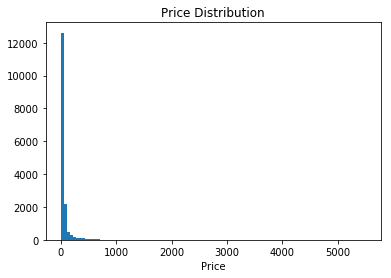

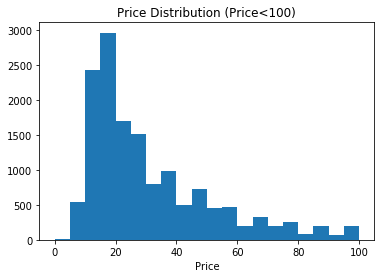

In [133]:
def PriceAnalysis():
    plt.hist(data['minPrice'],100)
    plt.xlabel('Price')
    plt.title('Price Distribution')
    plt.show()
    plt.hist(data[data['minPrice']<100]['minPrice'],20)
    plt.xlabel('Price')
    plt.title('Price Distribution (Price<100)')
    plt.show()
PriceAnalysis()

## 3.2 Varietal Analysis

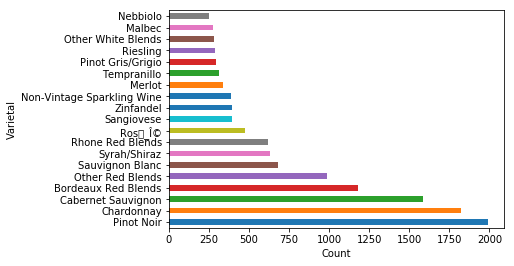

In [134]:
def varietalAnalysis():
    varietal=data.groupby(['Varietal']).size().sort_values(ascending=False)
    varietal[varietal>200].plot(kind="barh")
    plt.title('')
    plt.xlabel('Count')
varietalAnalysis()

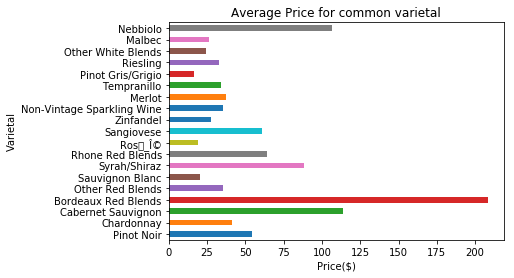

In [135]:
def varietal_price():
    varietal=data.groupby(['Varietal']).size().sort_values(ascending=False)
    df = data.groupby(['Varietal'])['minPrice'].agg(np.mean)
    varietal_price = pd.DataFrame(df)
    varietal_price
    df_new = pd.DataFrame(varietal[varietal>200])
    df_new.merge(varietal_price, left_index=True, right_index=True)['minPrice'].plot(kind="barh")
    plt.title('Average Price for common varietal')
    plt.xlabel('Price($)')
varietal_price()

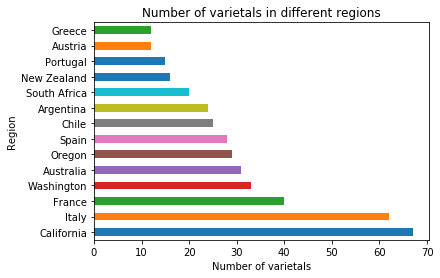

In [136]:
def varietal_region():
    varietal_country=data[['Country','Varietal']].drop_duplicates().groupby(['Country']).size().sort_values(ascending=False)
    varietal_country[varietal_country>10].plot(kind="barh")
    plt.title('Number of varietals in different regions')
    plt.xlabel('Number of varietals')
    plt.ylabel('Region')
varietal_region()

## 3.3 Region Analysis 

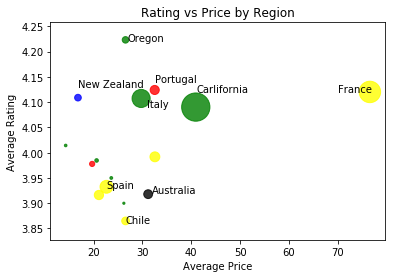

In [137]:
def regionAnalysis():
    wine = data[data["StarRating"]>0]
    count = pd.DataFrame(wine.groupby('Country').agg(['count'])['Title']).reset_index()
    avg_price = pd.DataFrame(wine.groupby('Country')['Price'].agg(['mean'])).reset_index()
    avg_star = pd.DataFrame(wine.groupby('Country')['StarRating'].agg(['mean'])).reset_index()
    count['avg_price'] = avg_price['mean']
    count['avg_star'] = avg_star['mean']
    count_revised =  count.loc[count['count'] >= 5].reset_index()
    col = ['yellow','black','green','yellow','yellow','green',
        'green','green','green','green','blue','green','red','red','yellow','yellow',
        'yellow','yellow','black','yellow','yellow','green','red','blue','green',
        'yellow','yellow']
    plt.title('Rating vs Price by Region')
    plt.xlabel('Average Price')
    plt.ylabel('Average Rating')
    plt.scatter(x = count_revised['avg_price'], y = count_revised['avg_star'], s = count_revised['count'], c = col, alpha = 0.8)
    plt.text(41, 4.12, 'Carlifornia')
    plt.text(70, 4.12, 'France')
    plt.text(31, 4.09, 'Italy' )
    plt.text(22.64, 3.93, 'Spain')
    plt.text(32, 3.92, 'Australia')
    plt.text(32.65,4.14, 'Portugal')
    plt.text(26.54, 3.86, 'Chile')
    plt.text(16.83, 4.13, 'New Zealand')
    plt.text(27, 4.22, 'Oregon')
regionAnalysis()

## 3.4 Year Analysis 

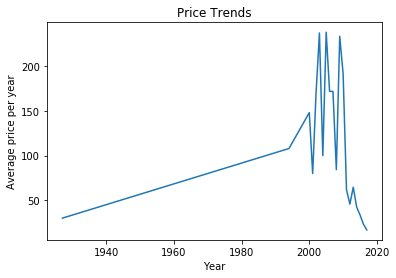

In [138]:
wine = data[data["StarRating"]>0]
year_price = pd.DataFrame(wine.groupby('Year')['Price'].agg(['mean'])).reset_index()
year_price
plt.xlabel('Year')
plt.ylabel('Average price per year')
plt.title('Price Trends')
plt.plot(year_price['Year'], year_price['mean'])

## 3.5 Professional Rating Analysis 

In [139]:
def drop_columns(df, column_names):
    df = df.drop(column_names, axis = 1)
    return df
def get_groupby_counts(df, groups):
    result = df.groupby(groups).count()
    return result

In [140]:
df = drop_columns(data, ['Shopping_Link','Img_src'])
df = df[df["Professional Score"] > 0]

In [141]:
professional_tab = pd.crosstab(df["Professional Score"], df['Country'], margins = True)
professional_tab

Country,Argentina,Australia,Austria,California,Chile,China,England,France,Germany,Greece,...,Other,Other U.S.,Portugal,Slovenia,South Africa,Spain,Uruguay,Virginia,Washington,All
Professional Score,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,23,0,0,0,4,1,0,...,0,0,0,0,0,1,0,0,0,29
9.0,48,37,10,521,24,0,2,198,12,5,...,1,1,34,1,16,84,0,1,41,1245
10.0,10,5,0,62,4,0,0,61,1,0,...,0,0,9,0,1,21,0,0,15,235
88.0,3,1,0,13,1,0,0,2,0,0,...,0,0,2,0,3,5,0,0,2,33
89.0,21,21,1,180,11,0,0,56,1,0,...,0,0,6,0,8,20,0,0,17,409
90.0,0,0,0,4,1,0,0,2,0,0,...,0,0,0,0,0,1,0,0,0,10
91.0,38,41,10,435,34,0,1,271,10,6,...,0,1,29,0,8,66,3,0,35,1179
92.0,46,66,7,509,29,0,3,356,7,2,...,0,0,23,0,14,82,1,1,43,1419
93.0,30,55,2,382,13,1,3,286,5,0,...,0,0,23,1,3,55,0,0,35,1085


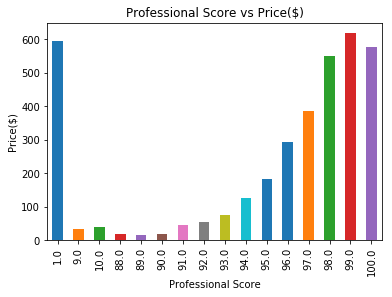

In [142]:
def professionalRating():
    professional_rating_price = data.groupby(['Professional Score']).Price.mean()
    professional_rating_price.plot.bar()
    plt.title('Professional Score vs Price($)')
    plt.ylabel('Price($)')
professionalRating()

## 3.5 Buyers Rating Analysis 

In [143]:
#buyer ratings Crosstab
df = drop_columns(data, ['Shopping_Link','Img_src'])
df = df[df["StarRating"] > 0]
buyer_tab = pd.crosstab(df.StarRating, df.Year, margins = True)
buyer_tab
rating25 = pd.DataFrame(buyer_tab[3:4] + buyer_tab[0:1].values + buyer_tab[1:2].values + buyer_tab[2:3].values, columns = buyer_tab[0:1].columns)
rating25
rating30 = pd.DataFrame(buyer_tab[4:5].values + buyer_tab[5:6].values + buyer_tab[6:7].values + buyer_tab[7:8].values + buyer_tab[8:9], columns = buyer_tab[0:1].columns)
rating30
rating35 = pd.DataFrame(buyer_tab[9:10].values + buyer_tab[10:11].values + buyer_tab[11:12].values + buyer_tab[12:13].values + buyer_tab[13:14], columns = buyer_tab[0:1].columns)
rating35
rating40 = pd.DataFrame(buyer_tab[14:15].values + buyer_tab[15:16].values + buyer_tab[16:17].values + buyer_tab[17:18].values + buyer_tab[18:19], columns = buyer_tab[0:1].columns)
rating40
rating45 = pd.DataFrame(buyer_tab[19:20].values + buyer_tab[20:21].values + buyer_tab[21:22].values + buyer_tab[22:23].values + buyer_tab[23:24], columns = buyer_tab[0:1].columns)
rating45
rating50 = pd.DataFrame(buyer_tab[24:25].values + buyer_tab[25:26].values + buyer_tab[26:27].values + buyer_tab[27:28].values + buyer_tab[28:29], columns = buyer_tab[0:1].columns)
rating50
allogate_crosstab = rating25.append(rating30)
allogate_crosstab = allogate_crosstab.append(rating35)
allogate_crosstab = allogate_crosstab.append(rating40)
allogate_crosstab = allogate_crosstab.append(rating45)
allogate_crosstab = allogate_crosstab.append(rating50)
allogate_crosstab

Year,1927.0,1994.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,All
StarRating,,,,,,,,,,,,,,,,,,,,,
2.6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,2,0,6
3.1,0,0,0,0,0,0,0,1,0,0,...,1,2,1,3,5,9,9,4,0,35
3.6,0,0,0,0,0,0,0,0,1,0,...,2,4,9,10,27,45,81,62,11,253
4.1,0,0,1,1,1,1,0,2,1,1,...,4,3,12,38,77,179,212,195,40,770
4.6,1,0,3,0,0,0,1,6,5,2,...,15,12,22,29,72,149,173,154,49,695
All,1,2,4,1,7,3,1,13,11,7,...,24,30,46,91,205,437,518,467,130,2005


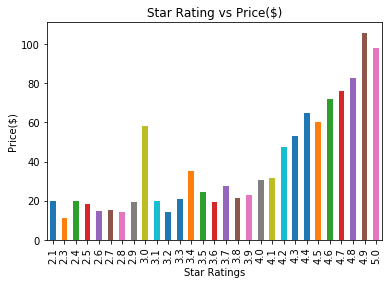

In [144]:
def buyerRating():
    star_rating_price = data.groupby(['StarRating']).Price.mean()
    star_rating_price.plot.bar()
    plt.title('Star Rating vs Price($)')
    plt.xlabel('Star Ratings')
    plt.ylabel('Price($)')
buyerRating()

## 3.6 Popularity Analysis 

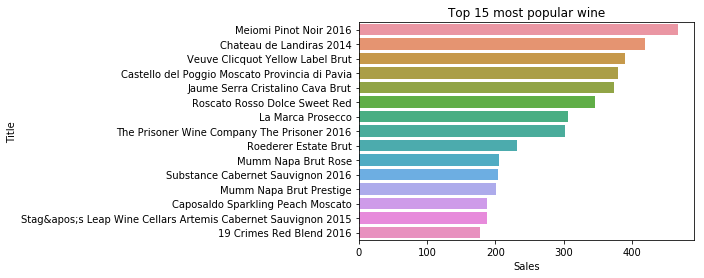

In [145]:
def popularityAnalysis():
    df = data.loc[:,['Title','numRater']]
    new_df = df.sort_values('numRater', ascending=False).head(15)
    sns.barplot(x='numRater', y='Title', data=new_df, orient='h')
    plt.title('Top 15 most popular wine')
    plt.xlabel('Sales')
popularityAnalysis()

# 4. Overview for Users

In [146]:
plot0 = interactive(popularityAnalysis)
plot1 = interactive(varietal_price)
plot2 = interactive(varietal_region)
plot3 = interactive(regionAnalysis)
plot4 = interactive(professionalRating)
plot5 = interactive(buyerRating)

In [147]:
children = [plot0,plot1, plot2, plot3, plot4,plot5]
tab = widgets.Tab()
tab.children = children
tab.set_title(0, 'Popular Wine')
tab.set_title(1, 'Varietal vs Price')
tab.set_title(2, 'Varietal vs Region')
tab.set_title(3, 'Region Overview')
tab.set_title(4, 'Professional Ratings Overview')
tab.set_title(5, 'Buyers Ratings Overview')
tab

Tab(children=(interactive(children=(Output(),), _dom_classes=('widget-interact',)), interactive(children=(Output(),), _dom_classes=('widget-interact',)), interactive(children=(Output(),), _dom_classes=('widget-interact',)), interactive(children=(Output(),), _dom_classes=('widget-interact',)), interactive(children=(Output(),), _dom_classes=('widget-interact',)), interactive(children=(Output(),), _dom_classes=('widget-interact',))), _titles={'0': 'Popular Wine', '1': 'Varietal vs Price', '2': 'Varietal vs Region', '3': 'Region Overview', '4': 'Professional Ratings Overview', '5': 'Buyers Ratings Overview'})

# 5. Recommendation System

## --Recommend Products based on Users' prefernces

## 5.1 Search by Title 

In [45]:
Search = widgets.Text(
    value= None,
    placeholder='Type something',
    description='Search:',
    disabled=False
)
Search

Text(value='', description='Search:', placeholder='Type something')

In [178]:
product_idx = {}
booleanVal_product=[None] * len(data)
for i in range(0, len(data)):
    ratio = fuzz.ratio(Search.value, data.ix[i,'Title'])
    partial_ratio = fuzz.partial_ratio(Search.value, data.ix[i,'Title'])
    token_ratio = fuzz.token_sort_ratio(Search.value,data.ix[i,'Title'])
    if ratio == 100: 
        print(str(i) + ' ' +data.ix[i,'Title'])
        product_idx[i] = ratio
        booleanVal_product[i] = True
    else:
        if partial_ratio >= 90:
            print(str(i) + ' ' +data.ix[i,'Title'])
            product_idx[i] = partial_ratio
            booleanVal_product[i] = True
        elif token_ratio >= 90:
            print(str(i) + ' ' +data.ix[i,'Title'])
            product_idx[i] = token_ratio
            booleanVal_product[i] = True
        else:
            booleanVal_product[i] = False

3 Rombauer Chardonnay 2017
9845 Merf Chardonnay 2017


In [179]:
df = data
df = df.loc[booleanVal_product,:]
df_product = pd.DataFrame(product_idx, index=['score']).T.sort_values(by='score',ascending=False)

In [181]:
index = list(df_product.index)
df_display = data.ix[index,['Title', 'minPrice', 'Professional Score', 'StarRating','numRater','Shopping_Link']]
df_display

,Title,minPrice,Professional Score,StarRating,numRater,Shopping_Link
3,Rombauer Chardonnay 2017,36.99,91.0,4.9,9,https://www.wine.com/product/Rombauer-Chardonn...
9845,Merf Chardonnay 2017,11.99,NaN,NaN,0,https://www.wine.com/product/Merf-Chardonnay-2...


## Compare Prices 

In [184]:
title = df_display.iloc[0,:]['Title']
title

'Rombauer Chardonnay 2017'

In [189]:
data2.head()

,Title,Price,StarRating,numRater,Shopping_Link,Img_src
0,Cloud Break Chardonnay,$ 8.99,width:86.0%,(110\tReviews)\t,https://www.totalwine.com/wine/white-wine/char...,https://image1.totalwine.com/media/sys_master/...
1,"Kendall Jackson Chardonnay, 2016",$ 9.97,width:84.0%,(56\tReviews)\t,https://www.totalwine.com/wine/white-wine/char...,https://image1.totalwine.com/media/sys_master/...
2,Veuve Clicquot Brut NV,$ 45.97,width:94.0%,(36\tReviews)\t,https://www.totalwine.com/wine/champagne-spark...,https://image1.totalwine.com/media/sys_master/...
3,Buttercream Chardonnay,$ 13.99,width:72.0%,(67\tReviews)\t,https://www.totalwine.com/wine/new-arrivals/wh...,https://image1.totalwine.com/media/sys_master/...
4,La Vostra Prosecco,$ 10.99,width:84.0%,(29\tReviews)\t,https://www.totalwine.com/wine/champagne-spark...,https://image1.totalwine.com/media/sys_master/...


In [194]:
# SEARCH TOTAL WINE 
for i in range(0, len(data2)):
    ratio = 0
    ratio = fuzz.ratio(title, data2.ix[i,'Title'])
    token_ratio = fuzz.token_sort_ratio(title, data2.ix[i,'Title'])
    if ratio == '100': 
        print(str(i) + ' ' +data2.ix[i,['Title', 'Price', 'Shopping_Link']])
    else:
        if token_ratio>=90:
            print(str(i) + ' ' +data2.ix[i,['Title', 'Price', 'Shopping_Link']])
    

Title                                 32 Rombauer Chardonnay, 2016
Price                                                   32 $ 37.97
Shopping_Link    32 https://www.totalwine.com/wine/white-wine/c...
Name: 32, dtype: object


TypeError: object of type 'float' has no len()

## 5.2 Search by Varietal 

In [101]:
selectVarietal = widgets.Dropdown(
    options=list(tasteData.iloc[:,0].unique()),
    value = None,
    description='Varietal:'
)
selectVarietal

Dropdown(description='Varietal:', options=('Falanghina', 'Negroamaro', 'Montepulciano', 'Grillo', 'Vermouth', 'Non-Vintage Sparkling Wine', 'Malvasia', 'Junmai', 'Junmai-Daiginjo', 'Junmai-Ginjo', 'Rhone White Blends', 'Zinfandel', 'Arneis', 'Tannat', 'Furmint', 'Picpoul', 'Madeira', 'Verdelho', 'Pinot Blanc', 'Gewurztraminer', 'Semillon', 'Pedro XimÕ©nez', 'Touriga Nacional', 'White Zinfandel', 'Red Sparkling Wine', 'Sherry', 'Gruner Veltliner', 'Lambrusco', 'Viognier', 'Vernaccia', 'Greco', 'Riesling', 'Vermentino', 'Chenin Blanc', 'In Box Glassware', 'Bordeaux White Blends', 'Other White Blends', 'Other White Wine', 'Pinotage', 'Petite Sirah', 'Mourvedre', 'Malbec', 'Sauvignon Blanc', 'Nebbiolo', 'Barbera', 'Bordeaux Red Blends', 'Friulano', 'Verdicchio', 'Gamay', 'Garganega', 'Rhone Red Blends', 'Grenache', 'Pinot Noir', 'Cabernet Franc', 'Tuscan Blends', 'Roussanne', 'Merlot', 'Pinot Gris/Grigio', 'Cabernet Sauvignon', 'Syrah/Shiraz', 'Tempranillo', 'Sangiovese', 'Chardonnay', 'Mixed Collections', 'Other Red Blends', 'Other Red Wine', 'Melon de Bourgogne', 'Assyrtiko', 'Aglianico', 'Verdejo', 'Grechetto', 'Muller Thurgau', 'Valdiguie', 'Lagrein', 'Aligote', 'Corvina', 'Zweigelt', 'Cortese', 'Trebbiano', 'Albarino', 'Godello', 'Petit Verdot', 'Dolcetto', 'Muscat', 'Carmenere', 'Bonarda', 'Cinsault', 'Port', 'Other Dessert', 'Torrontes', 'Carignan', 'Vintage Sparkling Wine', 'RosÕ© Sparkling Wine', 'Marsanne', 'RosÕ©', 'Nero d&apos;Avola', 'Primitivo', 'Grenache Blanc'), value=None)

In [156]:
#Display Introduction
varietal_filename = selectVarietal.value+".txt"
try:
    #varietal_intro[varietal_filename]
    print(varietal_intro[varietal_filename])
except:
    print("No Results Matched")


Chardonnay
Grown in cool climates, the variety delivers apple, pear and citrus fruit flavors and refreshing acidity. More moderate climates produce riper Chardonnay grapes with medium acidity and stone-fruit flavors. In warm regions, the typical Chardonnay taste is tropical, with pineapple and banana flavors, balanced with medium acidity.

In California, while an increasing number of winemakers offer unoaked or “naked” Chardonnays that more closely reflect Old World wine styles, most are dedicated to an oaky, New World style. The state’s many warm regions produce wines with high alcohol and full body, with cream, butterscotch, oak, peach and tropical fruit flavors. Cooler enclaves, such as Napa and Sonoma’s Carneros and Russian River Valley regions, deliver a more restrained Chardonnay.

Winemaking techniques add important secondary flavors to Chardonnay.

The popular buttery Chardonnay, the oaky Chardonnay with its devoted followers, is created by aging the wine with oak. This process

In [158]:
df = data
if selectVarietal.value: 
    boolVal_varietal = (df['Varietal'] == selectVarietal.value)
else:
    boolVal_varietal = (df['Varietal'] != 0)
    print("No result")
df.loc[boolVal_varietal,:]
#boolVal_varietal

,Title,Year,Varietal,Price,Region,Country,Score_WS,Score_RP,Score_W&S,Score_JH,...,Score_V,Score_JD,Professional Score,StarRating,numRater,Shopping_Link,Img_src,minPrice,meanRating,totalRater
3,Rombauer Chardonnay 2017,2017.0,Chardonnay,36.99,Carneros,California,NaN,NaN,NaN,NaN,...,NaN,NaN,91.0,4.9,9,https://www.wine.com/product/Rombauer-Chardonn...,https://www.wine.com/product/images/fl_progres...,36.99,4.900000,9
81,Cakebread Chardonnay 2016,2016.0,Chardonnay,36.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.6,8,https://www.wine.com/product/Cakebread-Chardon...,https://www.wine.com/product/images/fl_progres...,36.99,4.600000,8
87,La Crema Monterey Chardonnay 2016,2016.0,Chardonnay,17.99,Central Coast,California,NaN,NaN,NaN,NaN,...,NaN,NaN,91.0,4.3,31,https://www.wine.com/product/La-Crema-Monterey...,https://www.wine.com/product/images/fl_progres...,17.99,4.300000,31
93,Grgich Hills Estate Chardonnay 2014,2014.0,Chardonnay,36.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,93.0,4.5,20,https://www.wine.com/product/Grgich-Hills-Esta...,https://www.wine.com/product/images/fl_progres...,36.99,4.500000,20
126,Pahlmeyer Napa Valley Chardonnay 2016,2016.0,Chardonnay,89.99,Napa Valley,California,94.0,95.0,NaN,NaN,...,NaN,NaN,95.0,NaN,0,https://www.wine.com/product/Pahlmeyer-Napa-Va...,https://www.wine.com/product/images/fl_progres...,89.99,0.000000,0
149,Talbott Kali-Hart Chardonnay 2016,2016.0,Chardonnay,14.99,Central Coast,California,NaN,NaN,NaN,NaN,...,NaN,NaN,92.0,NaN,0,https://www.wine.com/product/Talbott-Kali-Hart...,https://www.wine.com/product/images/fl_progres...,14.99,0.000000,0
158,Hartford Court Russian River Chardonnay 2016,2016.0,Chardonnay,24.29,Sonoma County,California,NaN,NaN,NaN,NaN,...,93.0,91.0,92.0,4.0,11,https://www.wine.com/product/Hartford-Court-Ru...,https://www.wine.com/product/images/fl_progres...,24.29,4.000000,11
166,Raeburn Chardonnay 2016,2016.0,Chardonnay,16.99,Sonoma County,California,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,4.2,49,https://www.wine.com/product/Raeburn-Chardonna...,https://www.wine.com/product/images/fl_progres...,16.99,4.200000,49
179,Kendall-Jackson Vintner&apos;s Reserve Chardon...,2016.0,Chardonnay,12.99,NaN,California,NaN,NaN,NaN,NaN,...,NaN,NaN,91.0,4.1,101,https://www.wine.com/product/Kendall-Jackson-V...,https://www.wine.com/product/images/fl_progres...,12.99,4.100000,101
185,J. Lohr Riverstone Chardonnay 2016,2016.0,Chardonnay,9.77,Central Coast,California,NaN,NaN,NaN,NaN,...,NaN,NaN,92.0,3.9,76,https://www.wine.com/product/J-Lohr-Riverstone...,https://www.wine.com/product/images/fl_progres...,9.77,3.949451,91


## 5.3 Search by Price Range 

In [86]:
selectPrice = widgets.FloatRangeSlider(
    value=None,
    min=0,
    max=5500.0,
    step=0.1,
    description='Price Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
selectPrice

FloatRangeSlider(value=(1375.0, 4125.0), continuous_update=False, description='Price Range:', max=5500.0)

In [165]:
selectPrice.value
minPrice = selectPrice.value[0]
maxPrice = selectPrice.value[1]
df = data

boolVal_price = (df['Price']>=minPrice) & (df['Price']<=maxPrice)
df.loc[boolVal_price,:]

,Title,Year,Varietal,Price,Region,Country,Score_WS,Score_RP,Score_W&S,Score_JH,...,Score_V,Score_JD,Professional Score,StarRating,numRater,Shopping_Link,Img_src,minPrice,meanRating,totalRater
0,Caymus Napa Valley Cabernet Sauvignon 2016,2016.0,Cabernet Sauvignon,79.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,92.0,4.4,59,https://www.wine.com/product/Caymus-Napa-Valle...,https://www.wine.com/product/images/fl_progres...,79.99,4.400000,59
1,Dom Perignon with Gift Box 2009,2009.0,Vintage Sparkling Wine,189.97,Champagne,France,96.0,NaN,NaN,NaN,...,NaN,NaN,96.0,4.2,110,https://www.wine.com/product/Dom-Perignon-with...,https://www.wine.com/product/images/fl_progres...,189.97,4.200000,110
2,Ornellaia 2015,2015.0,Bordeaux Red Blends,219.99,Tuscany,Italy,97.0,NaN,NaN,NaN,...,98.0,NaN,98.0,3.5,5,https://www.wine.com/product/Ornellaia-2015/40...,https://www.wine.com/product/images/fl_progres...,219.99,3.500000,5
3,Rombauer Chardonnay 2017,2017.0,Chardonnay,36.99,Carneros,California,NaN,NaN,NaN,NaN,...,NaN,NaN,91.0,4.9,9,https://www.wine.com/product/Rombauer-Chardonn...,https://www.wine.com/product/images/fl_progres...,36.99,4.900000,9
4,Domaine de la Janasse Chateauneuf-du-Pape Cuve...,2016.0,Grenache,79.99,Rhone,France,95.0,97.0,NaN,NaN,...,NaN,99.0,97.0,NaN,0,https://www.wine.com/product/Domaine-de-la-Jan...,https://www.wine.com/product/images/fl_progres...,79.99,0.000000,0
5,Silver Oak Napa Valley Cabernet Sauvignon 2013,2013.0,Cabernet Sauvignon,114.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,94.0,4.5,102,https://www.wine.com/product/Silver-Oak-Napa-V...,https://www.wine.com/product/images/fl_progres...,114.99,4.500000,102
6,Duckhorn Vineyards 90+ Point Wine Gift Set,NaN,Mixed Collections,154.99,NaN,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Duckhorn-Vineyard...,https://www.wine.com/product/images/fl_progres...,154.99,0.000000,0
7,Tour Saint Christophe Les Terrasses de Saint C...,2014.0,Bordeaux Red Blends,21.99,Bordeaux,France,NaN,NaN,NaN,NaN,...,NaN,NaN,92.0,3.9,70,https://www.wine.com/product/Tour-Saint-Christ...,https://www.wine.com/product/images/fl_progres...,21.99,3.900000,70
8,Tua Rita Redigaffi Toscana 2015,2015.0,Merlot,299.99,Tuscany,Italy,95.0,97.0,NaN,NaN,...,NaN,NaN,98.0,NaN,0,https://www.wine.com/product/Tua-Rita-Redigaff...,https://www.wine.com/product/images/fl_progres...,299.99,0.000000,0
9,Duckhorn Napa Valley Cabernet Sauvignon 2015,2015.0,Cabernet Sauvignon,64.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,92.0,4.4,39,https://www.wine.com/product/Duckhorn-Napa-Val...,https://www.wine.com/product/images/fl_progres...,64.99,4.400000,39


## 5.4 Search by Region 

In [90]:
selectRegion = widgets.Dropdown(
    options= list(data['Country'].unique()),
    value = None,
    description='Region:'
)
selectRegion

Dropdown(description='Region:', options=('California', 'France', 'Italy', 'Spain', 'Washington', 'Other', 'Portugal', 'Oregon', nan, 'New Zealand', 'Australia', 'Argentina', 'Chile', 'South Africa', 'New Mexico', 'Germany', 'Greece', 'Uruguay', 'Canada', 'New York', 'Japan', 'Austria', 'Macedonia (FYROM)', 'China', 'Slovenia', 'Hungary', 'England', 'Lebanon', 'Brazil', 'Israel', 'Other U.S.', 'Croatia', 'Virginia', 'Turkey'), value=None)

In [162]:
if selectRegion.value:
    boolVal_region = (df['Country'] == selectRegion.value)
    print(df.loc[boolVal_region,:])
else:
    boolVal_region = (df['Country'] != 0)
    print("No results matched")

                                                   Title    Year  \
0             Caymus Napa Valley Cabernet Sauvignon 2016  2016.0   
3                               Rombauer Chardonnay 2017  2017.0   
5         Silver Oak Napa Valley Cabernet Sauvignon 2013  2013.0   
6             Duckhorn Vineyards 90+ Point Wine Gift Set     NaN   
9           Duckhorn Napa Valley Cabernet Sauvignon 2015  2015.0   
10                Joseph Phelps Insignia 2014 6 Pack OWC  2014.0   
11                                   Dominus Estate 2015  2015.0   
12               Scattered Peaks Cabernet Sauvignon 2015  2015.0   
13     Silver Oak Alexander Valley Cabernet Sauvignon...  2014.0   
14          Chappellet Signature Cabernet Sauvignon 2015  2015.0   
18     Kathryn Hall Cabernet Sauvignon 6-Pack + BONUS...     NaN   
19     Hall Eighteen Seventy-Three Cabernet Sauvignon...  2014.0   
20     Robert Mondavi To Kalon Vineyard Reserve Caber...  2014.0   
21                                        Quinte

## 5.5 Search by Year 

In [83]:
selectYear = widgets.IntRangeSlider(
    value=[1927, 2018],
    min=1927,
    max=2018,
    step=1,
    description='Year Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
selectYear

IntRangeSlider(value=(1927, 2018), continuous_update=False, description='Year Range:', max=2018, min=1927)

In [84]:
df = data
minYear = selectYear.value[0]
maxYear = selectYear.value[1]
boolVal_yr = (df['Year'] >= minYear) & (df['Year'] <= maxYear)
boolVal_yr
df.loc[boolVal_yr,:]

,Title,Year,Varietal,Price,Region,Country,Score_WS,Score_RP,Score_W&S,Score_JH,...,Score_V,Score_JD,Professional Score,StarRating,numRater,Shopping_Link,Img_src,minPrice,meanRating,totalRater
0,Caymus Napa Valley Cabernet Sauvignon 2016,2016.0,Cabernet Sauvignon,79.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,92.0,4.4,59,https://www.wine.com/product/Caymus-Napa-Valle...,https://www.wine.com/product/images/fl_progres...,79.99,4.400000,59
1,Dom Perignon with Gift Box 2009,2009.0,Vintage Sparkling Wine,189.97,Champagne,France,96.0,NaN,NaN,NaN,...,NaN,NaN,96.0,4.2,110,https://www.wine.com/product/Dom-Perignon-with...,https://www.wine.com/product/images/fl_progres...,189.97,4.200000,110
2,Ornellaia 2015,2015.0,Bordeaux Red Blends,219.99,Tuscany,Italy,97.0,NaN,NaN,NaN,...,98.0,NaN,98.0,3.5,5,https://www.wine.com/product/Ornellaia-2015/40...,https://www.wine.com/product/images/fl_progres...,219.99,3.500000,5
3,Rombauer Chardonnay 2017,2017.0,Chardonnay,36.99,Carneros,California,NaN,NaN,NaN,NaN,...,NaN,NaN,91.0,4.9,9,https://www.wine.com/product/Rombauer-Chardonn...,https://www.wine.com/product/images/fl_progres...,36.99,4.900000,9
4,Domaine de la Janasse Chateauneuf-du-Pape Cuve...,2016.0,Grenache,79.99,Rhone,France,95.0,97.0,NaN,NaN,...,NaN,99.0,97.0,NaN,0,https://www.wine.com/product/Domaine-de-la-Jan...,https://www.wine.com/product/images/fl_progres...,79.99,0.000000,0
5,Silver Oak Napa Valley Cabernet Sauvignon 2013,2013.0,Cabernet Sauvignon,114.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,94.0,4.5,102,https://www.wine.com/product/Silver-Oak-Napa-V...,https://www.wine.com/product/images/fl_progres...,114.99,4.500000,102
7,Tour Saint Christophe Les Terrasses de Saint C...,2014.0,Bordeaux Red Blends,21.99,Bordeaux,France,NaN,NaN,NaN,NaN,...,NaN,NaN,92.0,3.9,70,https://www.wine.com/product/Tour-Saint-Christ...,https://www.wine.com/product/images/fl_progres...,21.99,3.900000,70
8,Tua Rita Redigaffi Toscana 2015,2015.0,Merlot,299.99,Tuscany,Italy,95.0,97.0,NaN,NaN,...,NaN,NaN,98.0,NaN,0,https://www.wine.com/product/Tua-Rita-Redigaff...,https://www.wine.com/product/images/fl_progres...,299.99,0.000000,0
9,Duckhorn Napa Valley Cabernet Sauvignon 2015,2015.0,Cabernet Sauvignon,64.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,92.0,4.4,39,https://www.wine.com/product/Duckhorn-Napa-Val...,https://www.wine.com/product/images/fl_progres...,64.99,4.400000,39
10,Joseph Phelps Insignia 2014 6 Pack OWC,2014.0,Mixed Collections,1200.00,Napa Valley,California,NaN,97.0,NaN,NaN,...,NaN,NaN,97.0,NaN,0,https://www.wine.com/product/Joseph-Phelps-Ins...,https://www.wine.com/product/images/fl_progres...,1200.00,0.000000,0


## 5.6 Search by Taste 

In [73]:
selectTaste = widgets.Dropdown(
    options= list(tasteData.iloc[:,1].unique()),
    value = None,
    description='Taste:'
)
selectTaste

Dropdown(description='Taste:', options=('bitter, fruity', 'bitter, soft', 'chocolatey', 'dry, bitter, fruity', 'dry, bitter, light, herb', 'dry, fruity', 'dry, fruity, floral', 'dry, fruity, rice', 'dry, full,floral, smoky', 'dry, full_body', 'dry, light, floral', 'dry, rustic', 'dry, sharp, light', 'dry, sharp, peach', 'dry, smoky, lemon, herb', 'dry, smoky, sharp', 'dry, soft, light', 'dry, sweet', 'dry, sweet, citrusy', 'dry, sweet, floral', 'dry, sweet, fruity', 'dry, sweet, light, smooth', 'dry, sweet, sharp', 'dry, sweet, sharp, fruity', 'dry, sweet, tropical fruity', 'floral, peach, melon', 'fruity, apricot, mint', 'fruity, sharp', 'fruity, sharp,full', 'fruity, soft', 'full, berry', 'full, fruity', 'full_body', 'high_acidity, full_body, fruity', 'high_acidity, high_tannin', 'high_acidity, low_tannin, medium_body', 'high_tannin', 'light, floral, marine', 'light, fruity', 'light, fruity, almond', 'low_acidity', 'low_acidity, low_tannin', 'low_tannin', 'medium_acidity', 'medium_acidity, full_body', 'medium_acidity, light_body', 'medium_acidity, low_tannin, full_body', 'medium_acidity, medium_body, fruity', 'medium_acidity, medium_tannin, fruity', 'medium_body', 'off-dry, medium acidity', 'other', 'sharp', 'sharp, bitter, full', 'sharp, blossom, citrusy', 'sharp, floral, mint', 'sharp, floral, peach', 'sharp, fruity, black pepper', 'sharp, herb', 'sharp, light, floral', 'sharp, light, fruity', 'sharp, light, marine', 'sharp, light, melon', 'sharp,bitter,botanical', 'sharp,full, floral', 'soft, berry, herb', 'soft, bitter, fruity, almond', 'soft, floral, light', 'soft, fruity, berries', 'soft, light', 'sweet', 'sweet, floral', 'sweet, fruity', 'sweet, light, fruity', 'sweet, low_acidity, light_body', 'sweet, pepper', 'sweet, sharp, fruity', 'sweet, soft, floral'), value=None)

In [163]:
if selectTaste.value:
    boolVal_taste = (data_merged['Taste'] == selectTaste.value)
    data_merged.loc[boolVal_taste,:]
else:
    boolVal_taste = (data_merged['Taste'] != 0)
    print("No results matched")

data_merged.loc[boolVal_taste,:]

,Title,Year,Varietal,Price,Region,Country,Score_WS,Score_RP,Score_W&S,Score_JH,...,Score_JD,Professional Score,StarRating,numRater,Shopping_Link,Img_src,minPrice,meanRating,totalRater,Taste
3,Rombauer Chardonnay 2017,2017.0,Chardonnay,36.99,Carneros,California,NaN,NaN,NaN,NaN,...,NaN,91.0,4.9,9,https://www.wine.com/product/Rombauer-Chardonn...,https://www.wine.com/product/images/fl_progres...,36.99,4.900000,9,"off-dry, medium acidity"
81,Cakebread Chardonnay 2016,2016.0,Chardonnay,36.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,4.6,8,https://www.wine.com/product/Cakebread-Chardon...,https://www.wine.com/product/images/fl_progres...,36.99,4.600000,8,"off-dry, medium acidity"
87,La Crema Monterey Chardonnay 2016,2016.0,Chardonnay,17.99,Central Coast,California,NaN,NaN,NaN,NaN,...,NaN,91.0,4.3,31,https://www.wine.com/product/La-Crema-Monterey...,https://www.wine.com/product/images/fl_progres...,17.99,4.300000,31,"off-dry, medium acidity"
93,Grgich Hills Estate Chardonnay 2014,2014.0,Chardonnay,36.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,93.0,4.5,20,https://www.wine.com/product/Grgich-Hills-Esta...,https://www.wine.com/product/images/fl_progres...,36.99,4.500000,20,"off-dry, medium acidity"
126,Pahlmeyer Napa Valley Chardonnay 2016,2016.0,Chardonnay,89.99,Napa Valley,California,94.0,95.0,NaN,NaN,...,NaN,95.0,NaN,0,https://www.wine.com/product/Pahlmeyer-Napa-Va...,https://www.wine.com/product/images/fl_progres...,89.99,0.000000,0,"off-dry, medium acidity"
149,Talbott Kali-Hart Chardonnay 2016,2016.0,Chardonnay,14.99,Central Coast,California,NaN,NaN,NaN,NaN,...,NaN,92.0,NaN,0,https://www.wine.com/product/Talbott-Kali-Hart...,https://www.wine.com/product/images/fl_progres...,14.99,0.000000,0,"off-dry, medium acidity"
158,Hartford Court Russian River Chardonnay 2016,2016.0,Chardonnay,24.29,Sonoma County,California,NaN,NaN,NaN,NaN,...,91.0,92.0,4.0,11,https://www.wine.com/product/Hartford-Court-Ru...,https://www.wine.com/product/images/fl_progres...,24.29,4.000000,11,"off-dry, medium acidity"
166,Raeburn Chardonnay 2016,2016.0,Chardonnay,16.99,Sonoma County,California,NaN,NaN,NaN,NaN,...,NaN,9.0,4.2,49,https://www.wine.com/product/Raeburn-Chardonna...,https://www.wine.com/product/images/fl_progres...,16.99,4.200000,49,"off-dry, medium acidity"
179,Kendall-Jackson Vintner&apos;s Reserve Chardon...,2016.0,Chardonnay,12.99,NaN,California,NaN,NaN,NaN,NaN,...,NaN,91.0,4.1,101,https://www.wine.com/product/Kendall-Jackson-V...,https://www.wine.com/product/images/fl_progres...,12.99,4.100000,101,"off-dry, medium acidity"
185,J. Lohr Riverstone Chardonnay 2016,2016.0,Chardonnay,9.77,Central Coast,California,NaN,NaN,NaN,NaN,...,NaN,92.0,3.9,76,https://www.wine.com/product/J-Lohr-Riverstone...,https://www.wine.com/product/images/fl_progres...,9.77,3.949451,91,"off-dry, medium acidity"


## 5.7 Search by Varietal, Year, Taste and Region

In [167]:
boolVal_yr
boolVal_price
boolVal_varietal
boolVal_region
boolVal_taste

boolVal = []
for i in range(0, len(data)):
    boolVal.append(all([boolVal_yr[i], boolVal_price[i],boolVal_varietal[i],boolVal_region[i],boolVal_taste[i]]))
df = data_merged   
boolVal
if len(data_merged.loc[boolVal,:])>0: print(data_merged.loc[boolVal,:])
else: print("No Results Matched")
       

                                                   Title    Year    Varietal  \
3                               Rombauer Chardonnay 2017  2017.0  Chardonnay   
81                             Cakebread Chardonnay 2016  2016.0  Chardonnay   
87                     La Crema Monterey Chardonnay 2016  2016.0  Chardonnay   
93                   Grgich Hills Estate Chardonnay 2014  2014.0  Chardonnay   
126                Pahlmeyer Napa Valley Chardonnay 2016  2016.0  Chardonnay   
149                    Talbott Kali-Hart Chardonnay 2016  2016.0  Chardonnay   
158         Hartford Court Russian River Chardonnay 2016  2016.0  Chardonnay   
166                              Raeburn Chardonnay 2016  2016.0  Chardonnay   
179    Kendall-Jackson Vintner&apos;s Reserve Chardon...  2016.0  Chardonnay   
185                   J. Lohr Riverstone Chardonnay 2016  2016.0  Chardonnay   
186                           Far Niente Chardonnay 2017  2017.0  Chardonnay   
210    Frank Family Vineyards Lewis Vine

# 6. Recommend Similar Items

In [108]:
def find_similar_items(search_title):
    i=data[data['Title']==search_title].index[0]
    similar_list=pd.DataFrame(columns=['Title','Score'])
    for index in data.index:
        if index!=i:
            score=0
            r1=fuzz.token_sort_ratio(data.loc[index]['Title'], search_title)
            r2=fuzz.token_set_ratio(data.loc[index]['Title'], search_title)                        
            if max(r1,r2)>=80:
                score+=max(r1,r2)
            score+=max(0,10-abs(data.loc[index]['Year']-data.loc[i]['Year']))*5
            score+=min(data.loc[index]['Price'],data.loc[i]['Price'])/max(data.loc[index]['Price'],data.loc[i]['Price'])*50
            if data.loc[index]['Varietal']==data.loc[i]['Year']:
                score+=50
#             r1=fuzz.token_sort_ratio(data.loc[index]['Taste'], data.loc[i]['Taste'])
#             r2=fuzz.token_set_ratio(data.loc[index]['Taste'], data.loc[i]['Taste'])
#             score+=max(r1,r2)/2
            if data.loc[index]['Country']==data.loc[i]['Country']:
                score+=50   
            if data.loc[index]['Region']==data.loc[i]['Region']:
                score+=30  
            similar_list=similar_list.append({'Title': data.loc[index]['Title'],'Score': score},ignore_index=True)
    similar_items=similar_list.sort_values(by='Score',ascending=False).iloc[:20,:1].merge(data,on='Title')                      
    return similar_items
#find_similar_items('Rombauer Chardonnay 2017')
find_similar_items(df_display.iloc[0,:]['Title'])

,Title,Year,Varietal,Price,Region,Country,Score_WS,Score_RP,Score_W&S,Score_JH,...,Score_V,Score_JD,Professional Score,StarRating,numRater,Shopping_Link,Img_src,minPrice,meanRating,totalRater
0,Lloyd Chardonnay 2017,2017.0,Chardonnay,38.99,Carneros,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Lloyd-Chardonnay-...,https://www.wine.com/product/images/fl_progres...,38.99,0.0,0
1,Rombauer Chardonnay (375ML half-bottle) 2017,2017.0,Chardonnay,19.99,Carneros,California,NaN,NaN,NaN,NaN,...,NaN,NaN,91.0,NaN,0,https://www.wine.com/product/Rombauer-Chardonn...,https://www.wine.com/product/images/fl_progres...,19.99,0.0,0
2,Rombauer Chardonnay (1.5 Liter Magnum) 2017,2017.0,Chardonnay,81.97,Carneros,California,NaN,NaN,NaN,NaN,...,NaN,NaN,91.0,NaN,0,https://www.wine.com/product/Rombauer-Chardonn...,https://www.wine.com/product/images/fl_progres...,81.97,0.0,0
3,Rombauer Chardonnay (3 Liter Bottle) 2017,2017.0,Chardonnay,199.97,Carneros,California,NaN,NaN,NaN,NaN,...,NaN,NaN,91.0,NaN,0,https://www.wine.com/product/Rombauer-Chardonn...,https://www.wine.com/product/images/fl_progres...,199.97,0.0,0
4,Oberon Chardonnay 2016,2016.0,Chardonnay,22.99,Carneros,California,90.0,NaN,NaN,NaN,...,NaN,NaN,9.0,NaN,0,https://www.wine.com/product/Oberon-Chardonnay...,https://www.wine.com/product/images/fl_progres...,22.99,0.0,0
5,Quilt Chardonnay 2017,2017.0,Chardonnay,33.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Quilt-Chardonnay-...,https://www.wine.com/product/images/fl_progres...,33.99,0.0,0
6,AERENA Chardonnay 2017,2017.0,Chardonnay,23.99,Sonoma County,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/AERENA-Chardonnay...,https://www.wine.com/product/images/fl_progres...,23.99,0.0,0
7,Materra Chardonnay 2016,2016.0,Chardonnay,26.99,Napa Valley,California,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,NaN,0,https://www.wine.com/product/Materra-Chardonna...,https://www.wine.com/product/images/fl_progres...,26.99,0.0,0
8,Camp Chardonnay 2017,2017.0,Chardonnay,17.99,Sonoma County,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Camp-Chardonnay-2...,https://www.wine.com/product/images/fl_progres...,17.99,0.0,0
9,Simi Chardonnay 2017,2017.0,Chardonnay,14.99,Sonoma County,California,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,https://www.wine.com/product/Simi-Chardonnay-2...,https://www.wine.com/product/images/fl_progres...,14.99,0.0,0
